# What are Random Forests?

Otherwise known as Random Decision Forest, they are a method of machine learning that can preform regression and classification tasks. They comprise of decision trees which are essentially graphs of decisions that represent a certain statistical probablilty for a course of actions. 

Below we will have a look at random forests on the MNIST dataset.

In [9]:
#our imports
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pickle, gzip
import matplotlib.pyplot as plt
from mnist import MNIST
from PIL import Image, ImageDraw
import wget

In [2]:
#load our dataset
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

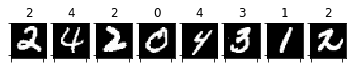

In [3]:
#plot some examples
examples = np.random.randint(10000, size=8)
n_examples = len(examples)
plt.figure()
for ix_example in range(n_examples):
    tmp = np.reshape(train_set[0][examples[ix_example],:], [28,28])
    ax = plt.subplot(1,n_examples, ix_example + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title(str(train_set[1][examples[ix_example]]))
    plt.imshow(tmp, cmap='gray')

In [4]:
#preparing our train/test splits
# Training data
train_X = valid_set[0]
train_y = valid_set[1]  
print('Shape of training set: ' + str(train_X.shape))

# change y [1D] to Y [2D] sparse array coding class
n_examples = len(train_y)
labels = np.unique(train_y)
train_Y = np.zeros((n_examples, len(labels)))
for ix_label in range(len(labels)):
    # Find examples with with a Label = lables(ix_label)
    ix_tmp = np.where(train_y == labels[ix_label])[0]
    train_Y[ix_tmp, ix_label] = 1


# Test data
test_X = test_set[0]
test_y = test_set[1] 
print('Shape of test set: ' + str(test_X.shape))

# change y [1D] to Y [2D] sparse array coding class
n_examples = len(test_y)
labels = np.unique(test_y)
test_Y = np.zeros((n_examples, len(labels)))
for ix_label in range(len(labels)):
    # Find examples with with a Label = lables(ix_label)
    ix_tmp = np.where(test_y == labels[ix_label])[0]
    test_Y[ix_tmp, ix_label] = 1

Shape of training set: (10000, 784)
Shape of test set: (10000, 784)


In [15]:
#our RFC object with some properties
rfc =  RandomForestClassifier(verbose=True)
print(rfc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=True,
            warm_start=False)


In [16]:
#training our MLP
iterations = 100
loss = np.zeros([iterations,1])

for ix in range(iterations):
    rfc.fit(train_X, train_Y)
    Y_hat = rfc.predict(train_X)
    y_tmp = np.argmax(Y_hat, axis=1)
    y_hat = labels[y_tmp]
    
    loss[ix] = (0.5)*np.square(y_hat - train_y).mean()

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

Training Accuracy: 98.75


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


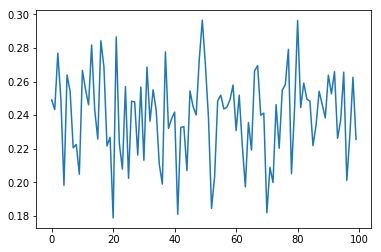

In [17]:
# Ploting loss vs iterations
plt.figure()
ix = np.arange(iterations)
plt.plot(ix, loss)

# Training Accuracy
Y_hat = rfc.predict(train_X)
y_tmp = np.argmax(Y_hat, axis=1)
y_hat = labels[y_tmp]

acc = np.mean(1 * (y_hat == train_y))
print('Training Accuracy: ' + str(acc*100))

In [18]:
#testing our RFC
Y_hat = rfc.predict(test_X)
y_tmp = np.argmax(Y_hat, axis=1)
y_hat = labels[y_tmp]

acc = np.mean(1 * (y_hat == test_y))
print('Testing Accuracy: ' + str(acc*100))

Testing Accuracy: 77.34


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
